In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import os

In [3]:
# sp500 = yf.Ticker("^GSPC")

# # sp500.info
# sp500 = sp500.history(period="max")
# sp500.to_csv("sp500.csv")

if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv")
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")
    
sp500

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1,1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
2,1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
3,1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
4,1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...,...
24278,2024-08-26 00:00:00-04:00,5639.660156,5651.620117,5602.339844,5616.839844,2938570000,0.0,0.0
24279,2024-08-27 00:00:00-04:00,5602.890137,5631.180176,5593.479980,5625.799805,2798990000,0.0,0.0
24280,2024-08-28 00:00:00-04:00,5624.509766,5627.029785,5560.950195,5592.180176,3053450000,0.0,0.0
24281,2024-08-29 00:00:00-04:00,5607.299805,5646.950195,5583.709961,5591.959961,3065640000,0.0,0.0


In [4]:
# clean data
print(sp500.isnull().sum())
print("\n===========================================\n")
print(sp500.info)

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


<bound method DataFrame.info of                             Date         Open         High          Low  \
0      1927-12-30 00:00:00-05:00    17.660000    17.660000    17.660000   
1      1928-01-03 00:00:00-05:00    17.760000    17.760000    17.760000   
2      1928-01-04 00:00:00-05:00    17.719999    17.719999    17.719999   
3      1928-01-05 00:00:00-05:00    17.549999    17.549999    17.549999   
4      1928-01-06 00:00:00-05:00    17.660000    17.660000    17.660000   
...                          ...          ...          ...          ...   
24278  2024-08-26 00:00:00-04:00  5639.660156  5651.620117  5602.339844   
24279  2024-08-27 00:00:00-04:00  5602.890137  5631.180176  5593.479980   
24280  2024-08-28 00:00:00-04:00  5624.509766  5627.029785  5560.950195   
24281  2024-08-29 00:00:00-04:00  5607.299805  5646.950195 

In [5]:
sp500.drop(columns = ["Dividends", "Stock Splits"], inplace=True)

In [7]:
'''
> encountered errors due to timezone information in the date column.
> i need to standardize the datetimes to utc to remove timezone discrepancy as datetime have specific time zone awareness
> i needed to make datetime naive by removing the timezone context entirely.
'''
sp500["Date"] = pd.to_datetime(sp500["Date"], utc=True)
sp500["Date"] = sp500["Date"].dt.tz_localize(None)
sp500["Date"] = sp500["Date"].dt.date


sp500.set_index("Date", inplace=True)

,Open,High,Low,Close,Volume
Date,,,,,
2024-04-10,5167.879883,5178.430176,5138.700195,5160.640137,3845930000
2024-04-11,5172.950195,5211.779785,5138.770020,5199.060059,3509380000
2024-04-12,5171.509766,5175.029785,5107.939941,5123.410156,3963220000
2024-04-15,5149.669922,5168.430176,5052.470215,5061.819824,3950210000
2024-04-16,5064.589844,5079.839844,5039.830078,5051.410156,4006200000
...,...,...,...,...,...
2024-08-26,5639.660156,5651.620117,5602.339844,5616.839844,2938570000
2024-08-27,5602.890137,5631.180176,5593.479980,5625.799805,2798990000
2024-08-28,5624.509766,5627.029785,5560.950195,5592.180176,3053450000


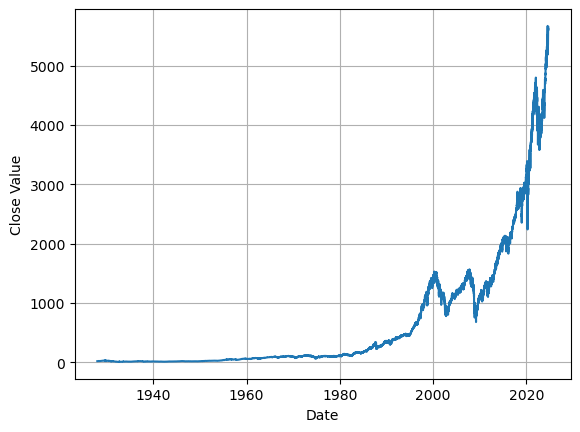

In [17]:
import matplotlib.pyplot as plt
'''
use the close column as it is the final price of the stock before the stock market closes.
'''
x = sp500.index
y = sp500["Close"]

plt.xlabel("Date")
plt.ylabel("Close Value")

plt.grid()
plt.plot(x,y)
plt.show()

In [28]:
'''
yesterday's closing -> next day's price
'''
sp500["Tomorrow"] = sp500["Close"].shift(-1)
# example
# sp500[["Tomorrow","Close"]]
'''
2024-08-26 close is: 5616.839844
2024-08-27 tomorrow is: 5592.180176
'''

'\n2024-08-26 close is: 5616.839844\n2024-08-27 tomorrow is: 5592.180176\n'

In [33]:
# example
ex = sp500[["Close", "Tomorrow"]]
ex

,Close,Tomorrow
Date,,
1927-12-30,17.660000,17.760000
1928-01-03,17.760000,17.719999
1928-01-04,17.719999,17.549999
1928-01-05,17.549999,17.660000
1928-01-06,17.660000,17.500000
...,...,...
2024-08-26,5616.839844,5625.799805
2024-08-27,5625.799805,5592.180176
2024-08-28,5592.180176,5591.959961


In [34]:
'''
2024-08-26 tomorrow is: 5625.799805 

2024-08-27 close is: 5625.799805

tomorrow is 27, the closing to 27 is 5625.799805

'''
ex.tail(5)

,Close,Tomorrow
Date,,
2024-08-26,5616.839844,5625.799805
2024-08-27,5625.799805,5592.180176
2024-08-28,5592.180176,5591.959961
2024-08-29,5591.959961,5648.399902
2024-08-30,5648.399902,NaN
